In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
import seaborn as sns
import nltk

In [38]:
df = pd.read_csv('data/BBC/BBC News Train.csv')

In [39]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [40]:
df['category_id'] = df['Category'].factorize()[0]

In [41]:
colslist = ['ArticleId','Text','Category','category_id']
df.columns = colslist

In [42]:
df.head()

,ArticleId,Text,Category,category_id
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


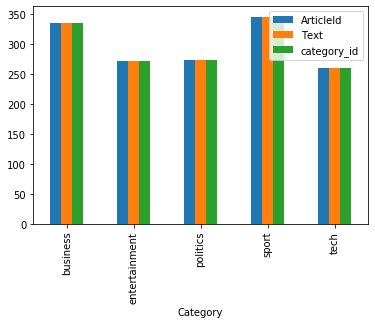

In [43]:
df.groupby('Category').count().plot.bar()

In [44]:
df.sample(5, random_state=0)

,ArticleId,Text,Category,category_id
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,4
354,1349,tory candidate quits over remark a conservativ...,politics,2
1227,1572,bath faced with tindall ultimatum mike tindall...,sport,3
907,1155,chancellor rallies labour voters gordon brown ...,politics,2
575,307,young debut cut short by ginepri fifteen-year-...,sport,3


In [45]:
text_file = open ("stopwords.txt",'r')
stopwords = text_file.read().split('\n')

In [54]:
stopwords = nltk.corpus.stopwords.words('english')

In [55]:
df['news_without_stopwords'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [56]:
print(len(df['news_without_stopwords'][0]))

1455


In [57]:
print(df['news_without_stopwords'])

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens maj...
3       lifestyle governs mobile choice faster better ...
4       enron bosses $168m payout eighteen former enro...
                              ...                        
1485    double eviction big brother model caprice holb...
1486    dj double act revamp chart show dj duo jk joel...
1487    weak dollar hits reuters revenues media group ...
1488    apple ipod family expands market apple expande...
1489    santy worm makes unwelcome visit thousands web...
Name: news_without_stopwords, Length: 1490, dtype: object


In [58]:
ps = PorterStemmer()

In [59]:
df['news_porter_stemmed'] = df['news_without_stopwords'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

In [60]:
print(df['news_without_stopwords'][0])

worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers battery fraud charges called company whistleblower first witness. cynthia cooper worldcom ex-head internal accounting alerted directors irregular accounting practices us telecoms giant 2002. warnings led collapse firm following discovery $11bn (£5.7bn) accounting fraud. mr ebbers pleaded guilty charges fraud conspiracy. prosecution lawyers argued mr ebbers orchestrated series accounting tricks worldcom ordering employees hide expenses inflate revenues meet wall street earnings estimates. ms cooper runs consulting business told jury new york wednesday external auditors arthur andersen approved worldcom accounting early 2001 2002. said andersen given green light procedures practices used worldcom. mr ebber lawyers said unaware fraud arguing auditors alert problems. ms cooper also said shareholder meetings mr ebbers often passed technical questions company finance chief giving brief answers himself. pr

In [61]:
print(df['news_porter_stemmed'][0])

worldcom ex-boss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first witness. cynthia cooper worldcom ex-head intern account alert director irregular account practic us telecom giant 2002. warn led collaps firm follow discoveri $11bn (£5.7bn) account fraud. mr ebber plead guilti charg fraud conspiracy. prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estimates. ms cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli 2001 2002. said andersen given green light procedur practic use worldcom. mr ebber lawyer said unawar fraud argu auditor alert problems. ms cooper also said sharehold meet mr ebber often pass technic question compani financ chief give brief answer himself. prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book . ho

In [62]:
df['news_porter_stemmed'] = df['news_porter_stemmed'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

In [63]:
df['news_porter_stemmed'][0]

'worldcom ex-boss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first witness. cynthia cooper worldcom ex-head intern account alert director irregular account practic us telecom giant 2002. warn led collaps firm follow discoveri $11bn (£5.7bn) account fraud. mr ebber plead guilti charg fraud conspiracy. prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estimates. ms cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli 2001 2002. said andersen given green light procedur practic use worldcom. mr ebber lawyer said unawar fraud argu auditor alert problems. ms cooper also said sharehold meet mr ebber often pass technic question compani financ chief give brief answer himself. prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book . h

In [64]:
df['news_porter_stemmed'] = df['news_porter_stemmed'].str.replace('[^\w\s]','')

In [65]:
df['news_porter_stemmed'][0]

'worldcom exboss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first witness cynthia cooper worldcom exhead intern account alert director irregular account practic us telecom giant 2002 warn led collaps firm follow discoveri 11bn 57bn account fraud mr ebber plead guilti charg fraud conspiracy prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estimates ms cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli 2001 2002 said andersen given green light procedur practic use worldcom mr ebber lawyer said unawar fraud argu auditor alert problems ms cooper also said sharehold meet mr ebber often pass technic question compani financ chief give brief answer himself prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book  howev ms cooper sa

In [66]:
freq = pd.Series(' '.join(df['news_porter_stemmed']).split()).value_counts()

In [67]:
freq.head()

said     4838
mr       2006
would    1711
year     1701
also     1426
dtype: int64

In [68]:
freq2 = freq[freq <= 3]
freq2

vh1              3
villain          3
425m             3
scour            3
tudor            3
                ..
minitourna       1
264th            1
wellflag         1
daimlerchryls    1
bst              1
Length: 15120, dtype: int64

In [69]:
freq3 = list(freq2.index.values)
freq3

['vh1',
 'villain',
 '425m',
 'scour',
 'tudor',
 'bonnair',
 'nowher',
 'honours',
 'prosecution',
 'populist',
 'lid',
 'sofa',
 'daddi',
 'autobiographi',
 'inconveni',
 'sylvain',
 'swipe',
 'nutter',
 'ravi',
 'turk',
 'silvio',
 'easygroup',
 'oneyear',
 'techfest',
 'taxi',
 'zajec',
 'blear',
 'electorate',
 'brownsword',
 'et',
 'rum',
 'ration',
 '43m',
 '450',
 'mangala',
 'lyricist',
 'seagat',
 'worthington',
 'grandfath',
 'deficits',
 'roadmap',
 'valuat',
 'keyword',
 'recount',
 'exot',
 '512mb',
 'hacan',
 'firstperson',
 'georgewbushcom',
 'rude',
 'angi',
 'christi',
 'filippo',
 'dvdlike',
 'uphold',
 'being',
 'jibe',
 'republic',
 'clown',
 'franciscobas',
 'quietli',
 'belmar',
 'suvs',
 'felix',
 'barton',
 'payne',
 'rib',
 'timet',
 'markedli',
 'sidefoot',
 'booker',
 'disregard',
 'qca',
 '10day',
 'icm',
 'massmarket',
 '84th',
 'puma',
 'lan',
 'errat',
 'by',
 'devonish',
 'shower',
 '286',
 'bori',
 'coltran',
 'epidemic',
 'hodg',
 'amazing',
 'standou

In [70]:
df['news_porter_stemmed'] = df['news_porter_stemmed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (freq3)]))

In [71]:
df = df[[ 'Category', 'category_id', 'news_porter_stemmed']]

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))

In [74]:
features = tfidf.fit_transform(df.news_porter_stemmed).toarray()
labels = df.category_id
features.shape

(1490, 9901)

In [75]:
df.columns = [ 'Category', 'category_id', 'news_porter_stemmed']

In [76]:
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')

In [77]:
category_to_id = dict(category_id_df.values)

In [78]:
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

In [79]:
from sklearn.feature_selection import chi2

In [80]:
N = 3

In [81]:
for Category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Category))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))


# 'business':
  . Most correlated unigrams:
       . profit
       . growth
       . bank
  . Most correlated bigrams:
       . econom growth
       . interest rate
       . analyst said
# 'entertainment':
  . Most correlated unigrams:
       . actor
       . star
       . film
  . Most correlated bigrams:
       . lo angel
       . best film
       . box offic
# 'politics':
  . Most correlated unigrams:
       . blair
       . tori
       . labour
  . Most correlated bigrams:
       . lib dem
       . toni blair
       . mr blair
# 'sport':
  . Most correlated unigrams:
       . coach
       . cup
       . champion
  . Most correlated bigrams:
       . grand slam
       . australian open
       . six nation
# 'tech':
  . Most correlated unigrams:
       . softwar
       . comput
       . user
  . Most correlated bigrams:
       . peopl use
       . let peopl
       . mobil phone


In [82]:
from sklearn.manifold import TSNE

In [83]:
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size= SAMPLE_SIZE,replace = False)
projected_features = TSNE(n_components=2,random_state=0).fit_transform(features[indices])
colors = ['pink','green','blue','orange','grey']

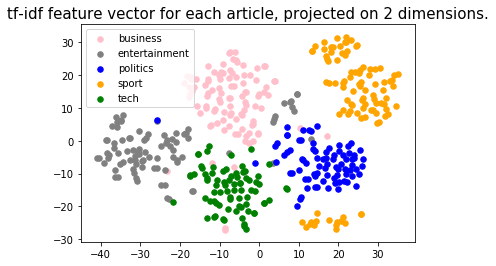

In [84]:
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [86]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

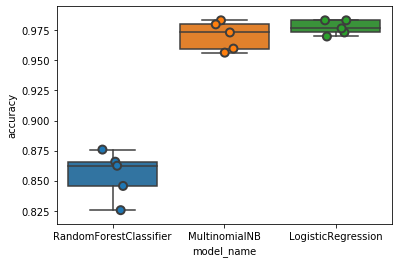

In [87]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,size=8, jitter=True, edgecolor="gray", linewidth=2)

In [88]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [89]:
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Text(0.5, 15.0, 'Predicted')

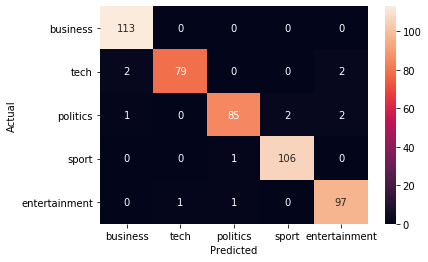

In [91]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [92]:
model.fit(features, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
from sklearn.feature_selection import chi2

In [94]:
N = 5

In [95]:
for Category, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(Category))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'business':
  . Top unigrams:
       . firm
       . compani
       . bank
       . market
       . econom
  . Top bigrams:
       . chief execut
       . last year
       . analyst said
       . stock market
       . interest rate
# 'entertainment':
  . Top unigrams:
       . film
       . star
       . music
       . singer
       . band
  . Top bigrams:
       . box offic
       . lo angel
       . number one
       . tv show
       . us tv
# 'politics':
  . Top unigrams:
       . labour
       . parti
       . mr
       . minist
       . elect
  . Top bigrams:
       . mr blair
       . toni blair
       . prime minist
       . mr brown
       . lib dem
# 'sport':
  . Top unigrams:
       . win
       . match
       . champion
       . player
       . coach
  . Top bigrams:
       . six nation
       . australian open
       . grand slam
       . world cup
       . bbc sport
# 'tech':
  . Top unigrams:
       . use
       . user
       . comput
       . technolog
       . softwar

In [96]:
texts = ["Hooli stock price soared after a dip in PiedPiper revenue growth.",
         "Captain Tsubasa scores a magnificent goal for the Japanese team.",
         "Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions.",
         "Beyoncé releases a new album, tops the charts in all of south-east Asia!",
         "You won't guess what the latest trend in data analysis is!"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

"Hooli stock price soared after a dip in PiedPiper revenue growth."
  - Predicted as: 'business'

"Captain Tsubasa scores a magnificent goal for the Japanese team."
  - Predicted as: 'sport'

"Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions."
  - Predicted as: 'sport'

"Beyoncé releases a new album, tops the charts in all of south-east Asia!"
  - Predicted as: 'entertainment'

"You won't guess what the latest trend in data analysis is!"
  - Predicted as: 'sport'



In [97]:
accuracy*100

98.3221476510067

In [107]:
df_test = pd.read_csv('data/BBC/BBC News Test.csv')

In [108]:
test_features = tfidf.transform(df_test.Text.tolist())

In [109]:
Y_pred = model.predict(test_features)

In [111]:
#Y_pred

In [114]:
Y_pred_name = []
for cat_id in Y_pred :
    Y_pred_name.append(id_to_category[cat_id])

In [116]:
submission = pd.DataFrame({"ArticleId": df_test["ArticleId"],"Category":Y_pred_name})

In [117]:
submission.to_csv('submission.csv', index=False)